In [ ]:
import pylab as p
#import iwavelets.pycwt as w
import math,numpy,matplotlib
import pickle
import numpy as np
import pandas as pd
import sys
import scipy
from swan import pycwt
from scipy import signal
from pylab import *
with open('/home/hera/nodoka/home2/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
#with open('/home/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
#with open('/Volumes/NO NAME/25kHz-data/B39 Rd.pickle',mode='rb') as fp:
    df = pickle.load(fp)
fs = 25000 #サンプリング周波数
#starttime = 1991.0946
#starttime = 1991.6946
#endtime = 1991.9946
starttime = 2219.5453
endtime = 2219.6253
start = int(starttime*fs)
end = int(endtime*fs)
datatime = []
#print(df[start:end])
#specdatab = np.array(df[start:end])
for i in range(len(df[start:end])):
#    print(i)
    datatime.append([(starttime+(i*0.00004))])
#print(datatime)

plt.figure(figsize=(10, 4))
plt.subplots_adjust(wspace=0.0, hspace=-0.4)
plt.subplot(4, 1, 1)
xlim(starttime,endtime)
plt.yticks([-3,-2,-1,0,1,2])
plt.ylim(-4,2)
ylabel("voltage [mV]")
#plt.xticks(color="None")
plt.plot(datatime,df[start:end])
plt.grid(which='major')
#gca().xaxis.set_minor_locator(MultipleLocator(0.04))
leng = np.arange(starttime, endtime, 0.04)
plt.xticks(leng,color="None")
#plt.xaxis.set_minor_locator(dates.DayLocator(interval=0.04))
#gca().xaxis.set_minor_locator(True,0.04)
del datatime

specdatab = np.array(df[start:end])
specdataa = specdatab.flatten()
fp.close
#widths = np.arange(1, 31)
P = 1024
widths = np.arange(1, P)

plt.subplot(2, 1, 2)
cwtmatr = pycwt.cwt_f(specdataa, widths, 25000, pycwt.Morlet())# pycwt.Mexican_hat(8))
#signal, scales, dt, wavelet = cwtmatr
rr = np.abs(cwtmatr)
#xlabel("time [second]")
xlabel("frequency [Hz]")
ylabel("power")
plt.yticks([1,10,100,1000])
plt.ylim(0,1.2)
#plt.yscale("log")
#im=plt.imshow(np.flipud(rr), extent=[starttime, endtime, P, 1], cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=-abs(cwtmatr).max())
#im=plt.imshow(np.flipud(rr), extent=[starttime, endtime, P, 1], cmap='PRGn', aspect='auto',vmax=abs(cwtmatr).max(), vmin=0)
#im = plt.imshow(np.flipud(rr), extent=[starttime, endtime, P, 1], aspect='auto', interpolation='nearest')


spec = pd.DataFrame(rr)
del cwtmatr, specdataa

#a =  np.empty(P,len(df[start:end]))
del rr
s=1000
h=150
spec_new = pd.DataFrame(index=spec.index, columns=[])
for i in range(0,len(df[start:end])-1,s) :
    #spec1 = spec[[i],[h:spec.index]]
    #print(spec[i])
    spec1 = spec[i]
    #spec1 = spec.iloc[h:,i]
    #print(spec[h:,i])
    mr = max(spec1)
    #print(mr)
    spec1 /= mr
    spec_new[i/s]=spec1
    plot(spec1)
    #print(type(spec1))
    #spec1.to_csv('torima.csv',index=False)
    #a[i,] = spec1
spec_new.T.to_csv('datatori.csv',index=False)
#im = plt.imshow(spec_new, extent=[starttime, endtime, P, 1], aspect='auto', interpolation='nearest')

#xlim(starttime, endtime)
#axColor = plt.axes([0.91, 0.13, 0.03, 0.45])
#plt.colorbar(im, cax=axColor, orientation="vertical")
#ylim(0, 4096)
#plt.colorbar(orientation='horizontal')
#plt.show()
plt.savefig('toriahigh.png',dpi=300)

#for i in range(len(freq)) :
 #   freq = cwtmatr[:,i]
    
#freq = pd.Series(cwtmatr, dtype='c8')
#freq1 = cwtmatr.ix[600]
#print(rr)
#spec = pd.DataFrame(rr)
#del cwtmatr

#a =  np.empty(P,len(df[start:end]))

#print(freq1)

#print(sys.path)

#p.show()
#plt.show(dpi=300)
#del df, widths, axColor, spec, spec1
del df, widths,  spec, spec1

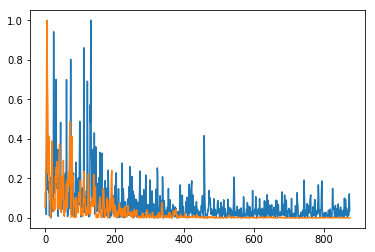

In [37]:
import pylab as p
#import iwavelets.pycwt as w
import math,numpy,matplotlib
import pickle
import numpy as np
import pandas as pd
import sys
import scipy
from swan import pycwt
from scipy import signal
from pylab import *
#with open('/home/hera/nodoka/home2/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
#with open('/home/nodoka/spike-data/25kHz-data/B39 Rd.pickle', mode='rb') as fp:
#with open('/Volumes/NO NAME/25kHz-data/B39 Rd.pickle',mode='rb') as fp:
#    df = pickle.load(fp)
spec = pd.read_csv('/home2/nodoka/18-kitada-bachelor-data/spectrogram/4ms-feature-data/rippledata/B39-2219.5453-2219.6253-150-nomalize.csv', header=None)
#spec = pd.read_csv('/home2/nodoka/18-kitada-bachelor-data/spectrogram/4ms-feature-data/rippledata/B39-2147.3232-2147.4633-150-nomalize.csv', header=None)
#fs = 25000 #サンプリング周波数
#starttime = 1991.0946
#starttime = 1991.6946
#endtime = 1991.9946
#starttime = 2219.5453
#endtime = 2219.6253
#start = int(starttime*fs)
#end = int(endtime*fs)
#print(spec)
#for i in range(2) :
#print()
plt.plot(spec.T[0])
plt.plot(spec.T[17])